<a href="https://colab.research.google.com/github/devashishsagar/Diabetes_Detection_Using_MVA_And_ML/blob/main/Diabetes_Detection_using_MVA_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes Detection using MVA and ML**

---



In [ ]:
#Importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from subprocess import check_output
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score

**Importing the dataset**

In [ ]:
data=pd.read_csv("/content/diabetes.csv") 

**Sneaking into the dataset**

In [ ]:
data.head(10) #printing top 10 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Statical aspect of dataset**

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Preprocessing - Checking for NAN values**

In [ ]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

**Understanding correlation between the labels**

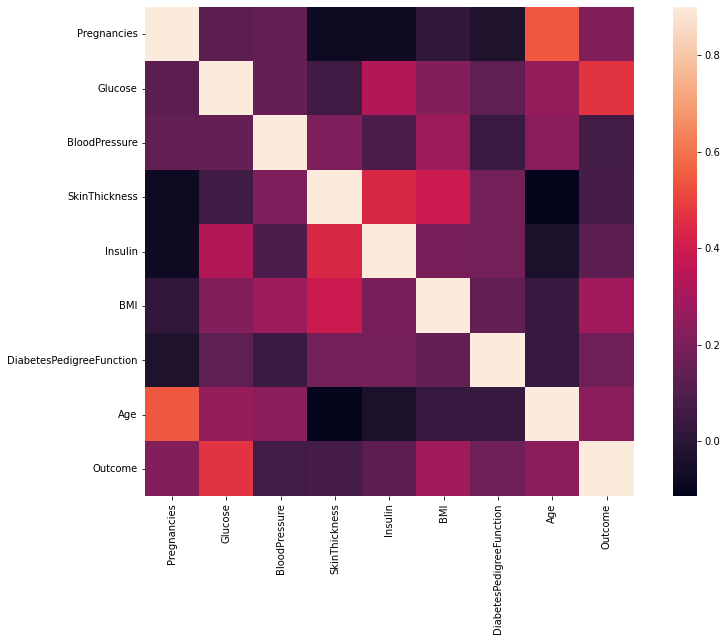

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [ ]:
#Correlation
correlation_metrics = data.corr()
fig = plt.figure(figsize = (14, 9))
sns.heatmap(correlation_metrics, vmax = .9, square = True) #annot = value
plt.show()
print(correlation_metrics)

**Number of people with no diabetes**

In [ ]:
No_sugar = 0
result = data['Outcome']
for i in range(len(result)):
  #print()
  if result[i]==0:
    No_sugar=No_sugar+1
print(No_sugar)


500


**Number of people with Diabetes**

In [ ]:
Sugar = 0
for i in range(len(result)):
  #print()
  if result[i]==1:
    Sugar=Sugar+1
print(Sugar)

268


**Printing count plot with Seaborn**

Text(0.5, 1.0, 'No Diabetes VS Diabetes')

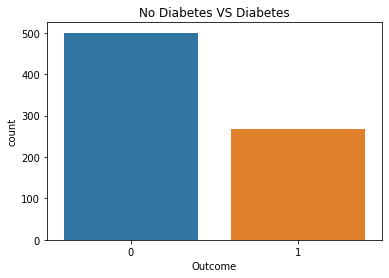

In [ ]:
##creating count plot with title using seaborn
sns.countplot(x=data.Outcome)
plt.title("No Diabetes VS Diabetes")

**Splitting the training and testing dataset**

In [ ]:
x=data.drop(['Outcome'], axis =1) #drop the target variable
y=data['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Using Logistic Regression**

In [ ]:
L= LogisticRegression()
L.fit(xtrain, ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Performance Predictions**

In [ ]:
y_pred=L.predict(xtest)

**Confusion Matrix**

In [ ]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[78 21]
 [18 37]]


**Final accuracy score**

In [ ]:
accuracy= L.score(xtest, ytest)
print('Accuracy score of the Logistic regression model: ', accuracy*100, '%')

Accuracy score of the Logistic regression model:  74.67532467532467 %
